Project 1 _ Group 5

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as dataframe
from matplotlib.lines import Line2D
#from stats import median
import plotly.plotly as py
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import numpy as np
import requests
import time
import json
from collections import Counter

# read excel file
obesity_cdc = pd.read_csv("cdc_obesity.csv")
census2010 = pd.read_csv("census2010.csv")
obesity_cdc.head()

,State,FIPS Codes,County,number_2004,percent_2004,lower confidence limit_2004,upper confidence limit_2004,age-adjusted percent_2004,age-adjusted lower confidence limit_2004,age-adjusted upper confidence limit_2004,...,age-adjusted percent_2010,age-adjusted lower confidence limit_2010,age-adjusted upper confidence limit_2010,number_2013,percent_2013,lower confidence limit_2013,upper confidence limit_2013,age-adjusted percent_2013,age-adjusted lower confidence limit_2013,age-adjusted upper confidence limit_2013
0,Alabama,1001,Autauga County,10180,30.2,24.7,36.5,29.8,24.4,36.2,...,30.4,25.3,35.5,13513,34.1,29,39.3,33.8,28.7,39.2
1,Alabama,1003,Baldwin County,30120,25.7,21.7,30.3,25.9,21.7,30.7,...,26.8,23.8,30.1,40365,27.4,24.8,30.5,27.2,24.3,30.6
2,Alabama,1005,Barbour County,6645,31.7,26,38.1,31.6,25.9,38.1,...,37.4,32,42.9,9186,44.4,38.4,50.4,44.7,38.5,51.1
3,Alabama,1007,Bibb County,4605,29.3,23.4,36.1,29.2,23.3,35.9,...,34.2,28.6,40.1,6940,40.3,34.1,46.9,40.3,33.9,47.1
4,Alabama,1009,Blount County,10330,25.5,20.2,31.7,25.4,20.1,31.8,...,30.3,24.9,36.5,14768,34.6,29.3,40.2,34.9,29.2,40.5


In [4]:
# CDC Data Clean-up: format to columns to string or floats
obesity_cdc['percent_2004'] = pd.to_numeric(obesity_cdc['percent_2004'],errors='coerce')
obesity_cdc['number_2004'] = pd.to_numeric(obesity_cdc['number_2004'],errors='coerce')
obesity_cdc['percent_2010'] = pd.to_numeric(obesity_cdc['percent_2010'],errors='coerce')
obesity_cdc['number_2010'] = pd.to_numeric(obesity_cdc['number_2010'],errors='coerce')
obesity_cdc['percent_2013'] = pd.to_numeric(obesity_cdc['percent_2013'],errors='coerce')
obesity_cdc['number_2013'] = pd.to_numeric(obesity_cdc['number_2013'],errors='coerce')
obesity_cdc['FIPS Codes'] = obesity_cdc['FIPS Codes'].apply('{:0>5}'.format)


In [5]:
obesity_cdc.dtypes

State                                        object
FIPS Codes                                   object
County                                       object
number_2004                                 float64
percent_2004                                float64
lower confidence limit_2004                  object
upper confidence limit_2004                  object
age-adjusted percent_2004                    object
age-adjusted lower confidence limit_2004     object
age-adjusted upper confidence limit_2004     object
number_2010                                 float64
percent_2010                                float64
lower confidence limit_2010                  object
upper confidence limit_2010                  object
age-adjusted percent_2010                    object
age-adjusted lower confidence limit_2010     object
age-adjusted upper confidence limit_2010     object
number_2013                                 float64
percent_2013                                float64
lower confid

In [6]:
#gdal.VersionsInfo()
obesity_df = obesity_cdc[["State","FIPS Codes", "County","number_2010","percent_2010","number_2013","percent_2013"]]
obesity_df.head()

,State,FIPS Codes,County,number_2010,percent_2010,number_2013,percent_2013
0,Alabama,01001,Autauga County,11761.0,30.5,13513.0,34.1
1,Alabama,01003,Baldwin County,36348.0,26.6,40365.0,27.4
2,Alabama,01005,Barbour County,7743.0,37.3,9186.0,44.4
3,Alabama,01007,Bibb County,5884.0,34.3,6940.0,40.3
4,Alabama,01009,Blount County,12690.0,30.4,14768.0,34.6


In [7]:
census2010.dtypes

Id                                                       object
Id2                                                     float64
Geography                                                object
Target Geo Id                                            object
Target Geo Id2                                          float64
Geographic area                                          object
Geographic area.1                                        object
Population                                               object
Housing units                                            object
Area in square miles - Total area                       float64
Area in square miles - Water area                       float64
Area in square miles - Land area                        float64
Density per square mile of land area - Population       float64
Density per square mile of land area - Housing units    float64
dtype: object

In [8]:
# CDC Data Clean-up: format to columns to string or floats
census2010.rename(columns={'Density per square mile of land area - Population':'density_2010_psq','Population': 'Pop_2010','Target Geo Id2':'FIPS Codes'},inplace=True)

In [9]:
#census2010['FIPS'] = census2010['FIPS'].round()
census2010['Pop_2010'] = pd.to_numeric(census2010['Pop_2010'],errors='coerce')
census2010['FIPS Codes'] = census2010['FIPS Codes'].astype(str).replace('\.0', '', regex=True)
census2010['FIPS Codes'] = census2010['FIPS Codes'].apply('{:0>5}'.format)
census2010.head()

,Id,Id2,Geography,Target Geo Id,FIPS Codes,Geographic area,Geographic area.1,Pop_2010,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,density_2010_psq,Density per square mile of land area - Housing units
0,0100000US,NaN,United States,0100000US,00nan,United States,United States,NaN,131704730(r15031),3796742.23,264836.79,3531905.43,87.4,37.3
1,0100000US,NaN,United States,0400000US01,00001,United States - Alabama,Alabama,NaN,2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0500000US01001,01001,United States - Alabama - Autauga County,Autauga County,54571.0,22135,604.39,9.95,594.44,91.8,37.2
3,0100000US,NaN,United States,0500000US01003,01003,United States - Alabama - Baldwin County,Baldwin County,182265.0,104061,2027.31,437.53,1589.78,114.6,65.5
4,0100000US,NaN,United States,0500000US01005,01005,United States - Alabama - Barbour County,Barbour County,27457.0,11829(r15033),904.52,19.64,884.88,31.0,13.4


In [10]:
merged_tbl = pd.merge(census2010, obesity_df, on="FIPS Codes")
merged_tbl.head()

,Id,Id2,Geography,Target Geo Id,FIPS Codes,Geographic area,Geographic area.1,Pop_2010,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,density_2010_psq,Density per square mile of land area - Housing units,State,County,number_2010,percent_2010,number_2013,percent_2013
0,0100000US,NaN,United States,0500000US01001,01001,United States - Alabama - Autauga County,Autauga County,54571.0,22135,604.39,9.95,594.44,91.8,37.2,Alabama,Autauga County,11761.0,30.5,13513.0,34.1
1,0100000US,NaN,United States,0500000US01003,01003,United States - Alabama - Baldwin County,Baldwin County,182265.0,104061,2027.31,437.53,1589.78,114.6,65.5,Alabama,Baldwin County,36348.0,26.6,40365.0,27.4
2,0100000US,NaN,United States,0500000US01005,01005,United States - Alabama - Barbour County,Barbour County,27457.0,11829(r15033),904.52,19.64,884.88,31.0,13.4,Alabama,Barbour County,7743.0,37.3,9186.0,44.4
3,0100000US,NaN,United States,0500000US01007,01007,United States - Alabama - Bibb County,Bibb County,22915.0,8981,626.17,3.59,622.58,36.8,14.4,Alabama,Bibb County,5884.0,34.3,6940.0,40.3
4,0100000US,NaN,United States,0500000US01009,01009,United States - Alabama - Blount County,Blount County,57322.0,23887,650.63,5.85,644.78,88.9,37.0,Alabama,Blount County,12690.0,30.4,14768.0,34.6


In [11]:
#Create new df from select columns in merged_tbl
main_df = merged_tbl[["FIPS Codes","State", "County","Pop_2010","density_2010_psq","percent_2010","percent_2013"]]
main_df.head()

,FIPS Codes,State,County,Pop_2010,density_2010_psq,percent_2010,percent_2013
0,01001,Alabama,Autauga County,54571.0,91.8,30.5,34.1
1,01003,Alabama,Baldwin County,182265.0,114.6,26.6,27.4
2,01005,Alabama,Barbour County,27457.0,31.0,37.3,44.4
3,01007,Alabama,Bibb County,22915.0,36.8,34.3,40.3
4,01009,Alabama,Blount County,57322.0,88.9,30.4,34.6


In [12]:
#Identify Outliers: Percentile of Pop density value
den = np.array(main_df['density_2010_psq'])
q1 = np.percentile(den,25)
q2 = np.percentile(den,50)
q3 = np.percentile(den,75)
print(f"Q1 is {q1}")
print(f"Median is {q2}")
print(f"Q3 is {q3}")


Q1 is 17.6
Median is 46.6
Q3 is 129.4


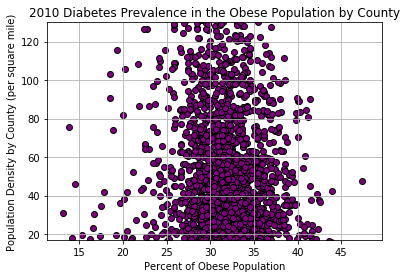

In [19]:
#2010 Scatter plot
plt.grid(True)
x = main_df['percent_2010']
y = main_df['density_2010_psq']

# Add trendline
##z = np.polyfit(x, y, 2)
##p = np.poly1d(z)
##plt.plot(x,p(x),"r--")
# the line equation:
##print('y=%.6fx+(%.6f)'%(z[0],z[1]))


# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of Obese Population")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(17, 130)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.show()

In [20]:
x, y = np.random.randn(main_df['percent_2010'], main_df['density_2010_psq'])
sns.jointplot(x, y, kind="reg")


TypeError: 'Series' object cannot be interpreted as an integer

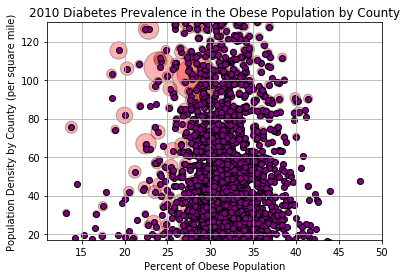

In [83]:
#2010 Bubble Scatter plot - within Q1 & Q3
plt.grid(True)
# calls columns from bubble_df
plt.scatter(x=main_df['percent_2010'],
            y=main_df['density_2010_psq'],
            s=main_df['Pop_2013']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")

 
# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of Obese Population")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(17, 130)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.show()

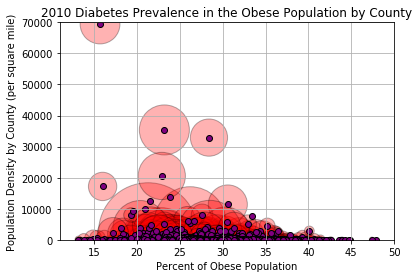

In [84]:
#2010 Bubble Scatter plot - Full Scale
plt.grid(True)
# calls columns from bubble_df
plt.scatter(x=main_df['percent_2010'],
            y=main_df['density_2010_psq'],
            s=main_df['Pop_2013']/1000,
            alpha = 0.3,
            c="Red",
            linewidth=1, edgecolor = "black")
 
# Create a title, x label, and y label for our chart
plt.title("2010 Diabetes Prevalence in the Obese Population by County")
plt.xlabel("Percent of Obese Population")
plt.ylabel("Population Density by County (per square mile)")


#define axis limits
plt.ylim(0, 70000)

plt.scatter(x, y, marker = "o", facecolors = "Purple", edgecolors = "black")
plt.show()

In [38]:
fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))
fig = ff.create_choropleth(fips=fips, values=values)
py.iplot(fig, filename='choropleth of some cali counties - full usa scope')

NameError: name 'ff' is not defined